# 导入函数包

In [6]:
import numpy as np

# 问题描述

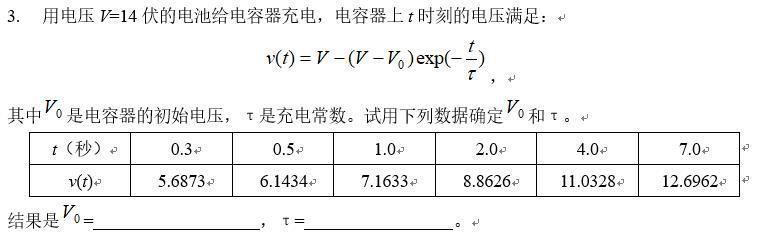

https://zhuanlan.zhihu.com/p/33184423

结果应该接近于

v_new =4.6892

tao_new =3.5910

# 算法解决方案

In [30]:
class solve_problem():
    def __init__(self):
        self.__init_param()

    def start_execute(self):
        V0_old = np.random.random()
        tau_old = np.random.random()
        if tau_old == 0 : tau_old += (np.random.random()-0.5)

        V0 = V0_old
        tau = tau_old


        while self.start_tmperature > self.end_tmperature:
            V0 = V0_old + (np.random.random()-0.5)
            tau = tau_old + (np.random.random()-0.5)

            if tau == 0 : tau += 0.01

            delta_energy = self.delta_energy_output(V0, tau, V0_old, tau_old)

            if self.is_accept(delta_energy, self.start_tmperature):
                V0_old = V0
                tau_old = tau
            self.start_tmperature *=  self.decay
        print('-----this is the end of execution-----')
        self.V0 = V0
        self.tau = tau

    def print_msg(self):
        print('V0 is ', self.V0, '  tau is ', self.tau)

    def __init_param(self):
        # decay fire param init
        self.start_tmperature = 1e5
        self.end_tmperature = 1e-5
        self.decay = 0.99
        #problem init
        self.V = 14
        self.t_array = np.array([0.3, 0.5, 1, 2, 4, 7])
        self.vt_array = np.array([5.6873, 6.1314, 7.1633, 8.8626, 11.0328, 12.6962])

    def is_accept(self, delta_energy, tmperature, k=1):
        if delta_energy < 0 :
            return True
        else:
            probability = np.exp( -delta_energy / (k*tmperature) )
            if probability > np.random.random():
                return True
            else:
                return False

    def delta_energy_output(self, V0, tau, V0_old, tau_old):
        error_now = self.formula_define(V0, tau)
        error_before = self.formula_define(V0_old, tau_old)
        return error_now - error_before

    def formula_define(self, V0, tau):
        vt_array_now = self.V - ( self.V-V0 ) * np.exp( -self.t_array / tau)
        error = np.square(self.vt_array - vt_array_now).sum()
        # import pdb;pdb.set_trace()
        return error


# 执行

In [33]:
evaluation_test = solve_problem()
evaluation_test.start_execute()
evaluation_test.print_msg()

-----this is the end of execution-----
V0 is  4.703690957192391   tau is  3.5603016636319125


> <ipython-input-1-92f5cc397b6e>(40)__init_param()
     38         #problem init
     39         self.V = 14
---> 40         self.t_array = np.array([0.3, 0.5, 1, 2, 4, 7])
     41         self.vt_array = np.array([5.6873, 6.1314, 7.1633, 8.8626, 11.0328, 12.6962])
     42 

ipdb> q
